# Satellite Imagery Analysis in Python

## Task 1: Open satellite imagery in Python 

Let us import the libraries. 

In [2]:
import rasterio as rio

### Open an image


In [3]:
# Path to the image
path = "C:/Users/User/Projects/CSE498R/Dhaka.tif"
rio.open(path)

# Open with Rasterio. Let us call it data


<open DatasetReader name='C:/Users/User/Projects/CSE498R/Dhaka.tif' mode='r'>

In [4]:
data = rio.open(path)

### META Data

* Coordinate Reference System (CRS)

In [5]:
data.crs #co-ordinate reference system

CRS.from_epsg(4326)

* width and height

In [6]:
data.height

781

In [7]:
data.width

640

* Image Bands

In [8]:
data.count

3

* The sentinel 2 data has 13 bands. The following table shows the band name and its resolution
<img src="images/s2-bands.png" width=1600 height=1600 />


* Meta data

In [9]:
data.meta #Info of the data

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 640,
 'height': 781,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0008983152841195215, 0.0, 90.12078593343864,
        0.0, -0.0008983152841195215, 24.112578856336196)}

## Task 2: Reading Satellite Image bands

In [10]:
data

<open DatasetReader name='C:/Users/User/Projects/CSE498R/Dhaka.tif' mode='r'>

### Read Individual Band

* Read the Red Band / Band 4


In [11]:
red = data.read(1)
red

array([[ 9,  9,  9, ...,  9,  9,  9],
       [13,  9,  9, ...,  9,  9,  9],
       [13, 13,  9, ..., 11,  9, 11],
       ...,
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9]], dtype=int16)

* Read the Green Band 

In [12]:
green = data.read(3)
green

array([[100,  96,  96, ..., 100,  96,  88],
       [100,  96, 100, ..., 100,  64,  64],
       [ 80,  64, 100, ...,  48, 100,  60],
       ...,
       [ 64,  60,  52, ...,  96, 100, 100],
       [ 52,  48,  60, ...,  92, 100, 100],
       [ 68, 100,  68, ..., 100,  88, 100]], dtype=int16)

In [13]:
blue = data.read(2)
blue

array([[ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       [13,  9,  9, ...,  9,  9,  9],
       ...,
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9]], dtype=int16)

### Statistical Values of the Image

* Mean Pixel Value

In [14]:
red.mean()

10.481013924455826

In [15]:
green.mean()

85.24827944942382

* The image size (Width and Height)

We can also print out the shape of the image when we read the band. 

In [16]:
red.shape

(781, 640)

In [17]:
red.shape[1]

640

In [18]:
green.shape

(781, 640)

### Reading All Bands

In [19]:
image_allbands = data.read()
image_allbands

array([[[  9,   9,   9, ...,   9,   9,   9],
        [ 13,   9,   9, ...,   9,   9,   9],
        [ 13,  13,   9, ...,  11,   9,  11],
        ...,
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9]],

       [[  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9],
        [ 13,   9,   9, ...,   9,   9,   9],
        ...,
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9]],

       [[100,  96,  96, ..., 100,  96,  88],
        [100,  96, 100, ..., 100,  64,  64],
        [ 80,  64, 100, ...,  48, 100,  60],
        ...,
        [ 64,  60,  52, ...,  96, 100, 100],
        [ 52,  48,  60, ...,  92, 100, 100],
        [ 68, 100,  68, ..., 100,  88, 100]]], dtype=int16)

In [20]:
image_allbands.shape #3 bands, width and height

(3, 781, 640)

## Task 3: Visualize Images

In [21]:
from rasterio.plot import show
import matplotlib.pyplot as plt

### Simple Plot

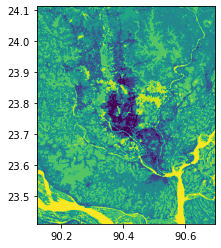

<AxesSubplot:>

In [22]:
show(data)

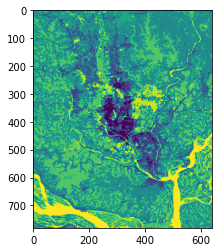

<AxesSubplot:>

In [23]:
show(red)

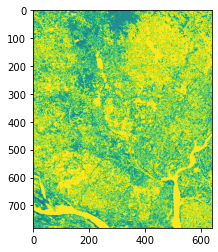

<AxesSubplot:>

In [24]:
show(green)

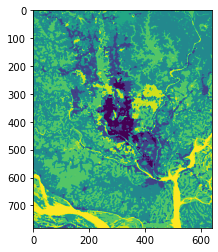

<AxesSubplot:>

In [25]:
show(blue)

### Increasing Plot size

<AxesSubplot:>

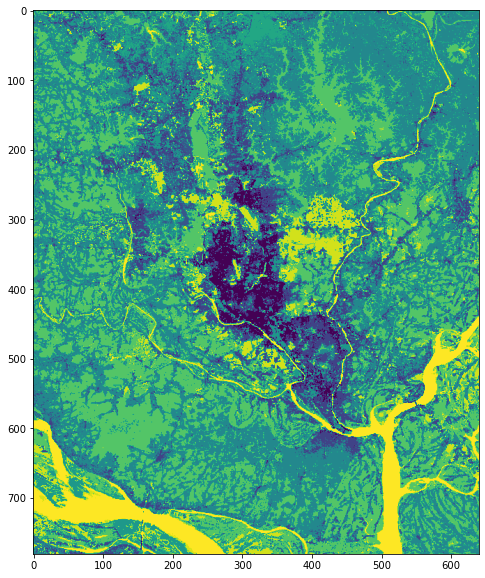

In [26]:
fig,ax = plt.subplots(figsize =(12,10))
show(red,ax = ax)

### Change Colors

* https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html

<AxesSubplot:>

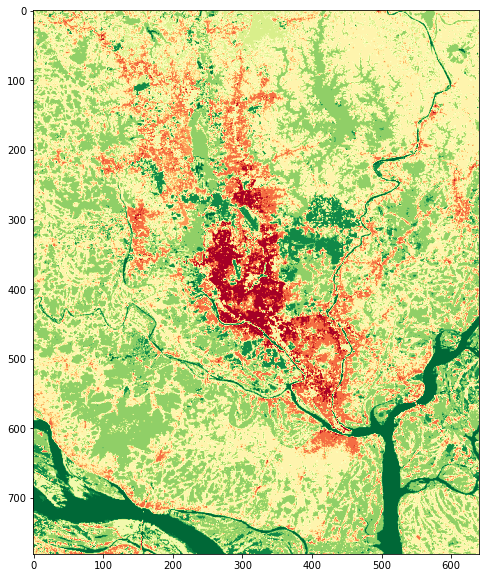

In [27]:
fig,ax = plt.subplots(figsize =(12,10))
show(red,cmap ='RdYlGn',ax = ax)

## Task 4: Numpy Array Manipulations

In [28]:
#Call red band (Arrays)
red

array([[ 9,  9,  9, ...,  9,  9,  9],
       [13,  9,  9, ...,  9,  9,  9],
       [13, 13,  9, ..., 11,  9, 11],
       ...,
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9]], dtype=int16)

In [29]:
# Red band shape
red.shape

(781, 640)

In [30]:
# Call all band image arrays
image_allbands

array([[[  9,   9,   9, ...,   9,   9,   9],
        [ 13,   9,   9, ...,   9,   9,   9],
        [ 13,  13,   9, ...,  11,   9,  11],
        ...,
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9]],

       [[  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9],
        [ 13,   9,   9, ...,   9,   9,   9],
        ...,
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9]],

       [[100,  96,  96, ..., 100,  96,  88],
        [100,  96, 100, ..., 100,  64,  64],
        [ 80,  64, 100, ...,  48, 100,  60],
        ...,
        [ 64,  60,  52, ...,  96, 100, 100],
        [ 52,  48,  60, ...,  92, 100, 100],
        [ 68, 100,  68, ..., 100,  88, 100]]], dtype=int16)

In [31]:
# Call image_allbands shape
image_allbands.shape

(3, 781, 640)

### Create subset Images with Indexes

In [32]:
# Row indexes
red[200:600]

array([[ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9, 13, 13],
       ...,
       [17, 17, 17, ..., 13, 13, 17],
       [17, 17, 17, ..., 13, 17, 17],
       [17, 17, 17, ..., 13, 17, 17]], dtype=int16)

<AxesSubplot:>

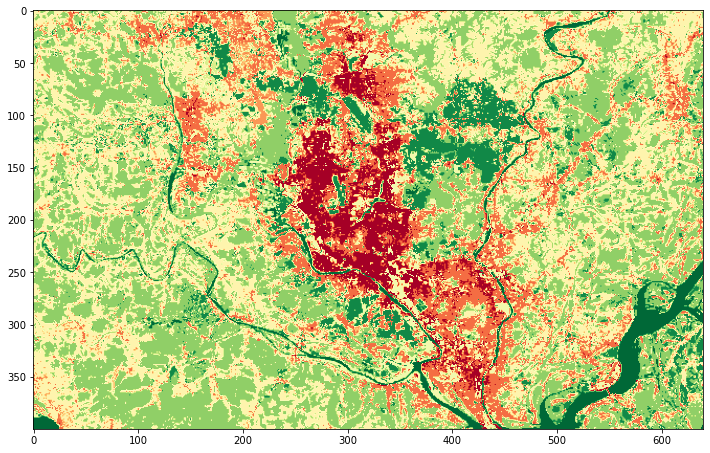

In [33]:
# Visualize row indexing
fig,ax = plt.subplots(figsize =(12,10))
show(red[200:600],cmap ='RdYlGn',ax = ax)

<AxesSubplot:>

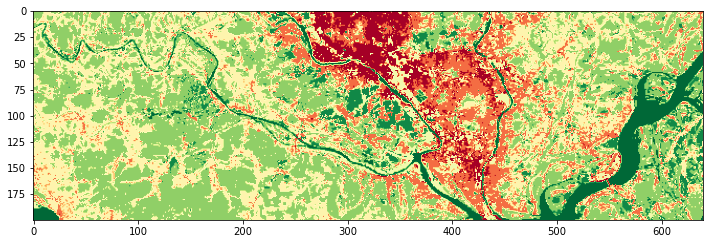

In [34]:
# Visualize row & column indexing
fig,ax = plt.subplots(figsize =(12,10))
show(red[400:600],cmap ='RdYlGn',ax = ax)

<AxesSubplot:>

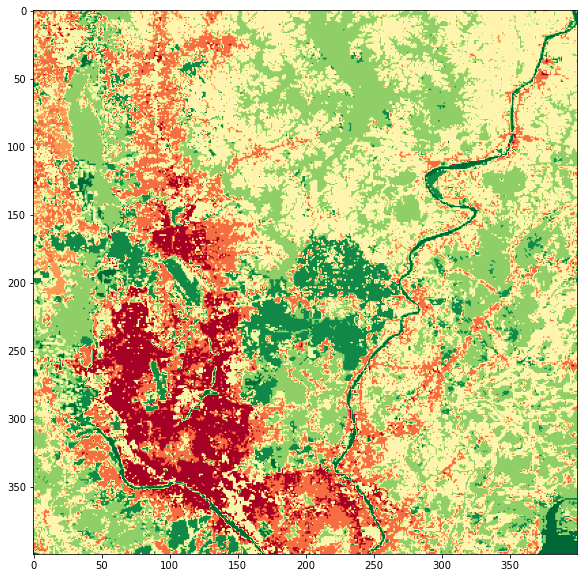

In [35]:
fig,ax = plt.subplots(figsize =(12,10))
show(red[100:500,200:600],cmap ='RdYlGn',ax = ax)

## Task 5: Clipping Images to Boundaries


### Read Vector Data

In [36]:
# Import geopandas 
import geopandas as gpd
import geoplot

In [37]:
dhk = gpd.read_file("CSE498R/data/c6d4aa0b72668033937bbd5c594cfd2b9f5de772_auto_qc_polygon.shp")

In [38]:
dhk.head(5)

id  Class      area  perimeter  \
0  906db906ee08bc7d075e695c711dcca664acf931      2  0.221741   2.485816   
1  17d2f5c8e5303d78c7d392b46aa9428abd32e24e      2  0.788821   3.512986   
2  718893c37bbb02a8c1011586a1c034ebef4501e0     10  0.277171   3.593404   
3  8e135b835419057bcac7a708e4bf8ddba62c2d17     13  0.739543   4.416821   
4  f6c02a95275b0c8fce16da536da5576dad9f7934     13  6.104170   9.825692   

      shape  vertices  qc_step1  qc_step2  qc_step3  \
0  2.217594         4         1         0         1   
1  1.244986         5         1         1         0   
2  3.707270         6         0         1         1   
3  2.099165         5         1         0         0   
4  1.258606         5         1         0         1   

                                 submission  author_id  \
0  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
1  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
2  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
3  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
4  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   

                                            geometry  
0  POLYGON Z ((90.36742 23.82078 0.00000, 90.3657...  
1  POLYGON Z ((90.38446 23.74286 0.00000, 90.3871...  
2  POLYGON Z ((90.36904 23.63279 0.00000, 90.3695...  
3  POLYGON Z ((90.34555 24.01958 0.00000, 90.3427...  
4  POLYGON Z ((90.48143 24.00707 0.00000, 90.4829...

In [39]:
dhk.tail(5)

id  Class      area  perimeter  \
12  c9de29dff5646e01a310488418bd3eeb31440a90     17  0.769366   8.305175   
13  fdf1bfd044c9397579d7eb60749c7dd45f02fd30     17  0.425300   7.139838   
14  587b145111c24d713ab8557823028acb466552ce     17  0.290438   5.474988   
15  a87415bac2ebaf9dbef6e0da67157ca2635a9bf8     17  0.463256   5.047698   
16  508a157950a227cad66f014eb22a6059d8118271     17  0.448792   6.777737   

       shape  vertices  qc_step1  qc_step2  qc_step3  \
12  7.134354         6         0         1         1   
13  9.538309         5         0         1         1   
14  8.213023         6         0         1         1   
15  4.376790         6         0         1         1   
16  8.145431         5         0         1         1   

                                  submission  author_id  \
12  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
13  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
14  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
15  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
16  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   

                                             geometry  
12  POLYGON Z ((90.56696 23.91701 0.00000, 90.5651...  
13  POLYGON Z ((90.55348 23.86647 0.00000, 90.5592...  
14  POLYGON Z ((90.52166 23.78998 0.00000, 90.5243...  
15  POLYGON Z ((90.23669 23.77573 0.00000, 90.2395...  
16  POLYGON Z ((90.35676 23.72477 0.00000, 90.3497...

In [40]:
dhk.columns

Index(['id', 'Class', 'area', 'perimeter', 'shape', 'vertices', 'qc_step1',
       'qc_step2', 'qc_step3', 'submission', 'author_id', 'geometry'],
      dtype='object')

<AxesSubplot:>

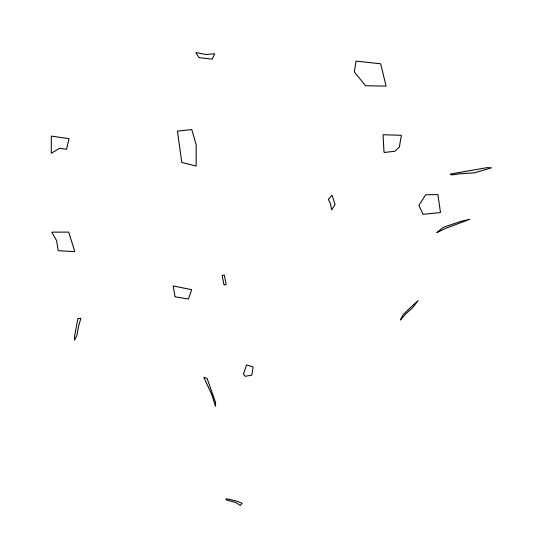

In [41]:
# Plot vector data
geoplot.polyplot(dhk, figsize=(20, 10))
#dhk.plot(figsize=(30,40))

### Mask the Data

In [42]:
# import mask
from rasterio.mask import mask

In [43]:
mask(data, dhk.geometry)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=int16),
 Affine(0.0008983152841195215, 0.0, 90.12078593343864,
        0.0, -0.0008983152841195215, 24.112578856336196))

In [44]:
# # Create masked and transform 
# clipped_image, image_transform = mask(data, dhk.geometry, crop = True)

In [45]:
# # Copy the meta
# image_meta = data.meta.copy()
# image_meta

In [46]:
# # Updata the meta
# clipped_image.shape
# image_meta.update(
#     {
#     'width': clipped_image.shape[2],
#     'height': clipped_image.shape[1],
#     'transform': image_transform})

In [47]:
# # Check image shape
# #write masked image
# rio.open('clipped_.tif','w',**image_meta).write(clipped_image)

### Read Masked Image and Visualize

In [48]:
# # Create an empty Image and write to the clipped image
# urban_image = rio.open('clipped_.tif')

In [49]:
# # Read clipped image from the output folder
# fig,ax = plt.subplots(figsize =(12,10))
# show(urban_image,ax = ax)

## Task 7: Derive Statistics.

In [50]:
# Read Grid Data
dhk = gpd.read_file("CSE498R/data/c6d4aa0b72668033937bbd5c594cfd2b9f5de772_auto_qc_polygon.shp")
dhk.head()

id  Class      area  perimeter  \
0  906db906ee08bc7d075e695c711dcca664acf931      2  0.221741   2.485816   
1  17d2f5c8e5303d78c7d392b46aa9428abd32e24e      2  0.788821   3.512986   
2  718893c37bbb02a8c1011586a1c034ebef4501e0     10  0.277171   3.593404   
3  8e135b835419057bcac7a708e4bf8ddba62c2d17     13  0.739543   4.416821   
4  f6c02a95275b0c8fce16da536da5576dad9f7934     13  6.104170   9.825692   

      shape  vertices  qc_step1  qc_step2  qc_step3  \
0  2.217594         4         1         0         1   
1  1.244986         5         1         1         0   
2  3.707270         6         0         1         1   
3  2.099165         5         1         0         0   
4  1.258606         5         1         0         1   

                                 submission  author_id  \
0  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
1  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
2  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
3  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
4  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   

                                            geometry  
0  POLYGON Z ((90.36742 23.82078 0.00000, 90.3657...  
1  POLYGON Z ((90.38446 23.74286 0.00000, 90.3871...  
2  POLYGON Z ((90.36904 23.63279 0.00000, 90.3695...  
3  POLYGON Z ((90.34555 24.01958 0.00000, 90.3427...  
4  POLYGON Z ((90.48143 24.00707 0.00000, 90.4829...

<AxesSubplot:>

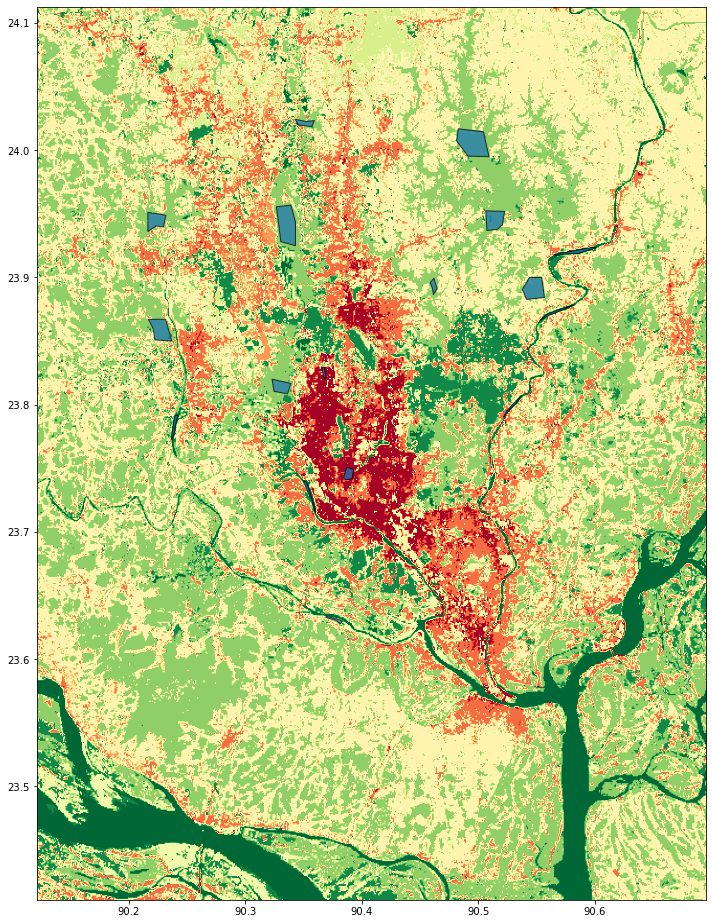

In [51]:
# Plot Both Grid data and NDVI
fig,ax = plt.subplots(figsize=(12,18))
show(data,cmap='RdYlGn',ax =ax)
dhk.plot(ax=ax,edgecolor ='black', alpha=0.750)

In [52]:
# Create a funciton to derive stats
def derive_stats(geom, data = data):
    masked, _ = mask(dataset=data, shapes =(geom, ),crop = True, all_touched = True, filled = True)
    return masked

In [53]:
# Create a column for Mean
import numpy as np
dhk["mean"] = dhk.geometry.apply(derive_stats).apply(np.mean)

In [54]:
# Grid head
dhk.head()

id  Class      area  perimeter  \
0  906db906ee08bc7d075e695c711dcca664acf931      2  0.221741   2.485816   
1  17d2f5c8e5303d78c7d392b46aa9428abd32e24e      2  0.788821   3.512986   
2  718893c37bbb02a8c1011586a1c034ebef4501e0     10  0.277171   3.593404   
3  8e135b835419057bcac7a708e4bf8ddba62c2d17     13  0.739543   4.416821   
4  f6c02a95275b0c8fce16da536da5576dad9f7934     13  6.104170   9.825692   

      shape  vertices  qc_step1  qc_step2  qc_step3  \
0  2.217594         4         1         0         1   
1  1.244986         5         1         1         0   
2  3.707270         6         0         1         1   
3  2.099165         5         1         0         0   
4  1.258606         5         1         0         1   

                                 submission  author_id  \
0  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
1  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
2  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
3  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   
4  c6d4aa0b72668033937bbd5c594cfd2b9f5de772         63   

                                            geometry       mean  
0  POLYGON Z ((90.36742 23.82078 0.00000, 90.3657...  23.246667  
1  POLYGON Z ((90.38446 23.74286 0.00000, 90.3871...  26.433333  
2  POLYGON Z ((90.36904 23.63279 0.00000, 90.3695...  14.366947  
3  POLYGON Z ((90.34555 24.01958 0.00000, 90.3427...  26.947368  
4  POLYGON Z ((90.48143 24.00707 0.00000, 90.4829...  31.000401

In [55]:
# Write to file (shapefile or csv)
dhk.to_file('dhk_stats.shp')

In [56]:
dhk2 = gpd.read_file("dhk_stats.shp")

<AxesSubplot:>

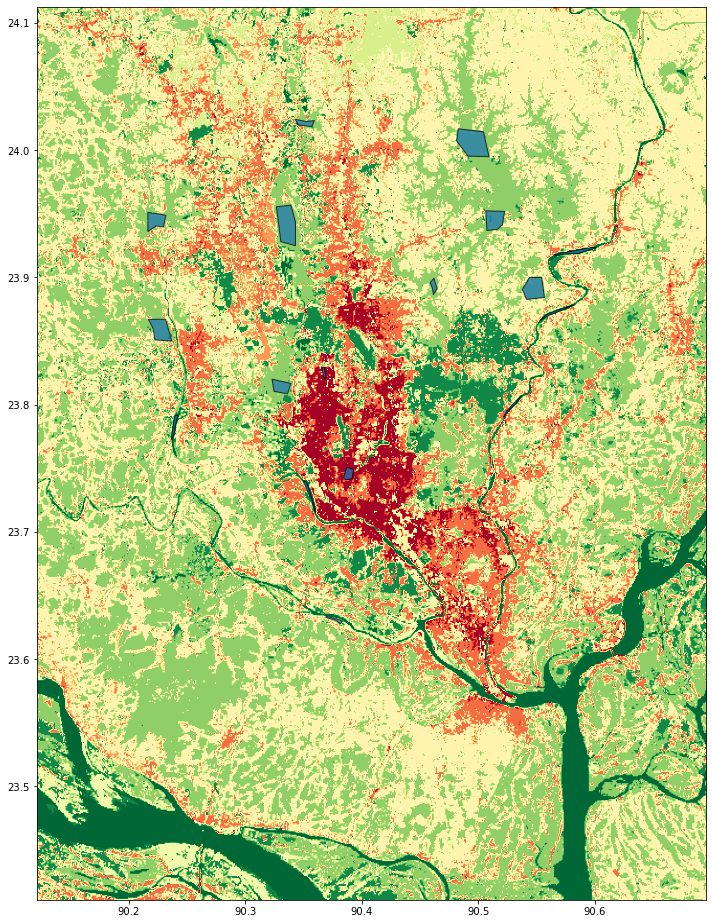

In [57]:
fig,ax = plt.subplots(figsize=(12,18))
show(data,cmap='RdYlGn',ax =ax)
dhk2.plot(ax=ax,edgecolor ='black', alpha=0.750)

## Task 8: Clustering

In [58]:
from sklearn.cluster import KMeans

(781, 640)

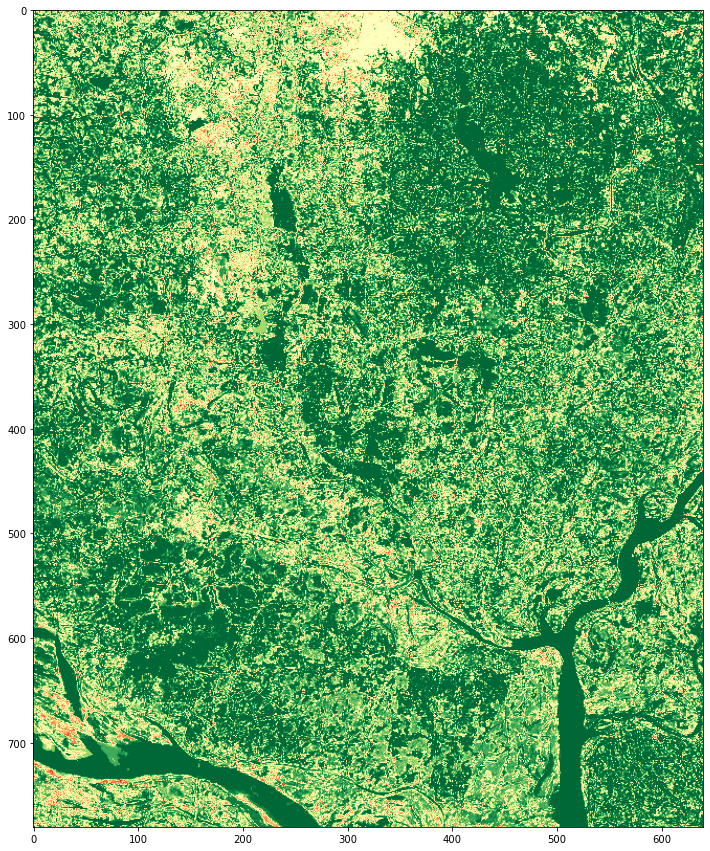

In [59]:
fig,ax = plt.subplots(figsize=(12,18))
show(green,cmap='RdYlGn',ax =ax)
#show(red,cmap='RdYlGn',ax =ax)
#show(blue,cmap='RdYlGn',ax =ax)
green.shape

In [60]:
img_to_cluster = green.reshape((-1,1))

In [61]:
data_to_cluster =red.reshape((-1,1))

In [62]:
img_to_cluster.shape

(499840, 1)

In [63]:
data_to_cluster.shape

(499840, 1)

In [64]:
img_to_cluster

array([[100],
       [ 96],
       [ 96],
       ...,
       [100],
       [ 88],
       [100]], dtype=int16)

In [65]:
data_to_cluster 

array([[9],
       [9],
       [9],
       ...,
       [9],
       [9],
       [9]], dtype=int16)

In [66]:
k_mean = KMeans(n_clusters = 10)

In [67]:
#k_mean.fit(img_to_cluster)

In [68]:
k_mean.fit(data_to_cluster)

KMeans(n_clusters=10)

In [69]:
clusters = k_mean.labels_

In [70]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
cluster_img = clusters.reshape(red.shape)

In [72]:
cluster_img

array([[0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 3, 0, ..., 7, 0, 7],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
cluster_img.shape

(781, 640)

<AxesSubplot:>

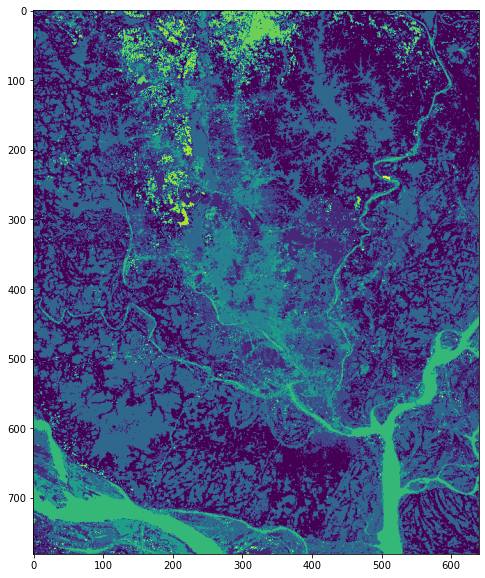

In [78]:
fig,ax = plt.subplots(figsize=(20,10))
show(cluster_img,ax=ax)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_to_cluster)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# for k in range(2, 11):
#     # = KMeans(n_clusters=k, **kmeans_kwargs)
    #k_mean.fit(img_to_cluster)
score = silhouette_score(data_to_cluster, k_mean.labels_)
#     silhouette_coefficients.append(score)
    
# plt.plot(range(2, 11), silhouette_coefficients)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()
#sse.append(kmeans.inertia_)
print(score)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# for k in range(2, 11):
#     # = KMeans(n_clusters=k, **kmeans_kwargs)
    #k_mean.fit(img_to_cluster)
score = silhouette_score(img_to_cluster, k_mean.labels_)
#     silhouette_coefficients.append(score)
    
# plt.plot(range(2, 11), silhouette_coefficients)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()
#sse.append(kmeans.inertia_)
print(score)